In [1]:
import keras
from keras import Sequential
from keras.datasets import mnist
import os
from keras import layers
from keras import backend as k
import json
from keras.losses import categorical_crossentropy
import cv2 
from keras.models import model_from_json
from keras.optimizers import Adadelta
import numpy as np
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28

if k.image_data_format() == 'channels_first':
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_test = X_test.astype('float32')
X_test /= 255

json_file = open('model_digit.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_digit.h5")
loaded_model.compile(loss=categorical_crossentropy, optimizer=Adadelta(),metrics=['accuracy'])

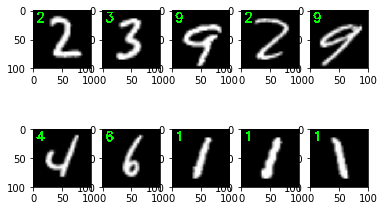

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5)
i = 1
for num in np.random.choice(np.arange(0, len(y_test)), size=(10,)):
    # Predict the label of digit using CNN.
    probs = loaded_model.predict(X_test[np.newaxis, num])
    prediction = probs.argmax(axis=1)
    # Resize the Image to 100x100 from 28x28 for better view.
    image = (X_test[num].reshape(1,28,28)[0] * 255).astype("uint8")
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, str(prediction[0]), (5, 20),cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # Show and print the Actual Image and Predicted Label Value
    plt.subplot(2, 5, i)
    i += 1
    #print('Predicted Label: {}, Actual Value: {}'.format(prediction[0],y_test[num]))
    
    imshow(image)